# Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

Задание 1. Подберите скорость обучения (alpha) и количество итераций:

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [4]:
X[1]

array([ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2])

In [5]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [6]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

Итоговый алгоритм

In [7]:

c=1
iter_count=34

for i in range(iter_count):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
  alpha=c/(i+1)
  if i % 5 == 0:
        print(i, W, err)
    
print('------------------------------------------------')    
print(i, W, err)

0 [1.01102 0.534  ] 3173.15
5 [ 260253.62879761 1409130.81937911] 1222862968184.4907
10 [-4.55164359e+07 -2.46491183e+08] 2.3311953100747315e+17
15 [1.84769135e+08 1.00060349e+09] 1.5284876611425128e+19
20 [-2.55184278e+07 -1.38193432e+08] 1.1539713031417603e+18
25 [ 68144.9486957  368781.77775519] 49778262562456.1
30 [47.2609984   3.78765234] 7132.7908860570915
------------------------------------------------
33 [47.27731019  3.90235801] 45.9386699490435


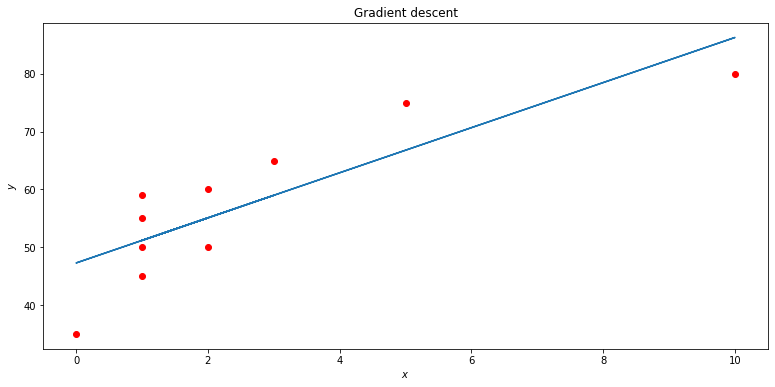

In [8]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


plt.scatter(X[1], y, c='r')
plt.plot(X[1], W @ X)

plt.show()

Ответ:
1. Скорость обучения (alpha) считается по формуле:
$$\alpha_{k} = \frac{c}{k},$$
где $c$ - некоторая константа, а $k$ - номер шага (у нас iter_num).

  Оптимальное c=1, т.о. на каждом шаге 
$$\alpha_{k} = \frac{1}{k},$$

2. Оптимальное число итераций iter_count = 33 - тогда ошибка err практически не меняется и минимальна и равна 45.938.

Задание *2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [9]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [10]:
iter_count=34
c=1

for i in range(iter_count):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  #for ii in range(W.shape[0]):
   # W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))     
  W-=(alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1)))
  alpha=c/(i+1)
  if i % 5 == 0:    
    print(i, W, err)
    
print('------------------------------------------------')        
print(i, W, err)

0 [1.01102 0.534  ] 3173.15
5 [ 260253.62879761 1409130.81937911] 1222862968184.4907
10 [-4.55164359e+07 -2.46491183e+08] 2.3311953100747315e+17
15 [1.84769135e+08 1.00060349e+09] 1.5284876611425128e+19
20 [-2.55184278e+07 -1.38193432e+08] 1.1539713031417603e+18
25 [ 68144.9486957  368781.77775519] 49778262562456.1
30 [47.2609984   3.78765234] 7132.7908860570915
------------------------------------------------
33 [47.27731019  3.90235801] 45.9386699490435


Ответ:

надо заменить np.sum(X * (y_pred - y)) на np.sum(X * (y_pred - y),axis=1)
чтобы суммировать по строкам

Задание *3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию 
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn)

In [11]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [12]:
c=1

# критерий сходимости (  разница между ошибками, при которой алгоритм останавливается)
min_err_dist = 1e-8

# зададим начальную разницу между ошибками большим числом
err_current_dist = np.inf

# счетчик итераций
iter_num = 0

while err_current_dist > min_err_dist:        
    y_pred = np.dot(W, X)
    err_pred = calc_mse(y, y_pred)   
    W-=(alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1)))   
    y_pred = np.dot(W, X)
    err_current = calc_mse(y, y_pred)   
    err_current_dist = np.linalg.norm(err_current - err_pred)
    
    iter_num += 1
    alpha=c/(iter_num)
  

print(iter_num)
print(W)
print(err_current) 

584
[47.23442229  3.91029337]
45.93750279335819
